4


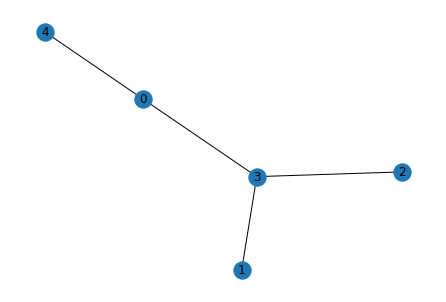

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms.tree.mst import SpanningTreeIterator

from itertools import product

from query_graphs.query_graphs import QueryGraphs

i = 0

#query_graph = QueryGraphs().get_graph_7(4)
query_graph = QueryGraphs().get_graph_8(5)

n_joins = len(query_graph.edges) - len(nx.cycle_basis(query_graph))
max_number_of_levels = n_joins
print(max_number_of_levels)
levels = range(max_number_of_levels)
variables = set()
tables = query_graph.nodes()

cardinality = {}
for node in query_graph.nodes(data=True):
    cardinality[node[0]] = node[1]['cardinality']

selectivity = {}
for edge in query_graph.edges(data=True):
    selectivity[(edge[0], edge[1])] = edge[2]['selectivity']
    
nx.draw(query_graph, with_labels=True)

In [2]:
def cost(i, j, level):
    if level == 0:
        
        sorted_var = tuple(sorted([i, j]))
        return [[(sorted_var[0], sorted_var[1], 0)]]
    
    else:
        vars = []
        previous_vars2, previous_vars1 = [], []
        sorted_var = tuple(sorted([i, j]))
        
        for n in query_graph.neighbors(i):
            if n == j:
                continue
            previous_vars1 = cost(n, i, level - 1)
            for var in previous_vars1:
                if sorted_var not in [tuple(sorted([var[0], var[1]])) for var in var]:
                    if len(var) == level:
                        vars.append([(sorted_var[0], sorted_var[1], level)] + var)
        
        for n in query_graph.neighbors(j):
            if n == i:
                continue
            previous_vars2 = cost(j, n, level - 1)
            for var in previous_vars2:
                if sorted_var not in [tuple(sorted([var[0], var[1]])) for var in var]:
                    if len(var) == level:
                        vars.append([(sorted_var[0], sorted_var[1], level)] + var)
                        
        return vars + previous_vars1 + previous_vars2
    
def unwrap_variables(variables):
    result = []
    for j in range(len(variables) - 1, -1, -1):
        subresult = []
        for var in variables:
            if var[-1] <= j:
                subresult.append(var)
        result.append(subresult)
    return result

In [ ]:
total = []
for edge in query_graph.edges():
    print(edge)
    for e in cost(edge[0], edge[1], max_number_of_levels - 1):
        total.append(unwrap_variables(e))

for t in total:
    print(t)

In [3]:
cost(0, 4, max_number_of_levels - 1)

[[(0, 3, 7),
  (0, 4, 6),
  (4, 6, 5),
  (1, 6, 4),
  (2, 6, 3),
  (6, 7, 2),
  (7, 8, 1),
  (5, 8, 0)],
 [(0, 3, 7),
  (0, 4, 6),
  (4, 6, 5),
  (2, 6, 4),
  (1, 6, 3),
  (6, 7, 2),
  (7, 8, 1),
  (5, 8, 0)],
 [(0, 3, 7),
  (0, 4, 6),
  (4, 9, 5),
  (4, 6, 4),
  (1, 6, 3),
  (2, 6, 2),
  (6, 7, 1),
  (7, 8, 0)],
 [(0, 3, 7),
  (0, 4, 6),
  (4, 9, 5),
  (4, 6, 4),
  (1, 6, 3),
  (6, 7, 2),
  (7, 8, 1),
  (5, 8, 0)],
 [(0, 3, 7),
  (0, 4, 6),
  (4, 9, 5),
  (4, 6, 4),
  (2, 6, 3),
  (1, 6, 2),
  (6, 7, 1),
  (7, 8, 0)],
 [(0, 3, 7),
  (0, 4, 6),
  (4, 9, 5),
  (4, 6, 4),
  (2, 6, 3),
  (6, 7, 2),
  (7, 8, 1),
  (5, 8, 0)],
 [(0, 4, 6), (4, 6, 5), (1, 6, 4), (2, 6, 3), (6, 7, 2), (7, 8, 1), (5, 8, 0)],
 [(0, 4, 6), (4, 6, 5), (2, 6, 4), (1, 6, 3), (6, 7, 2), (7, 8, 1), (5, 8, 0)],
 [(0, 4, 6), (4, 9, 5), (4, 6, 4), (1, 6, 3), (2, 6, 2), (6, 7, 1), (7, 8, 0)],
 [(0, 4, 6), (4, 9, 5), (4, 6, 4), (1, 6, 3), (6, 7, 2), (7, 8, 1), (5, 8, 0)],
 [(0, 4, 6), (4, 9, 5), (4, 6, 4), (2, 6, 3), (1, 